<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/Copia_de_segunda_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parte 2:Transformada de Laplace**

PREGUNTA 1 : Consultar y realizar los ejercicios propuestos en el cuaderno Transformada de Fourier. la solucion de la pregunta 1 se visualiza en el siguiente link

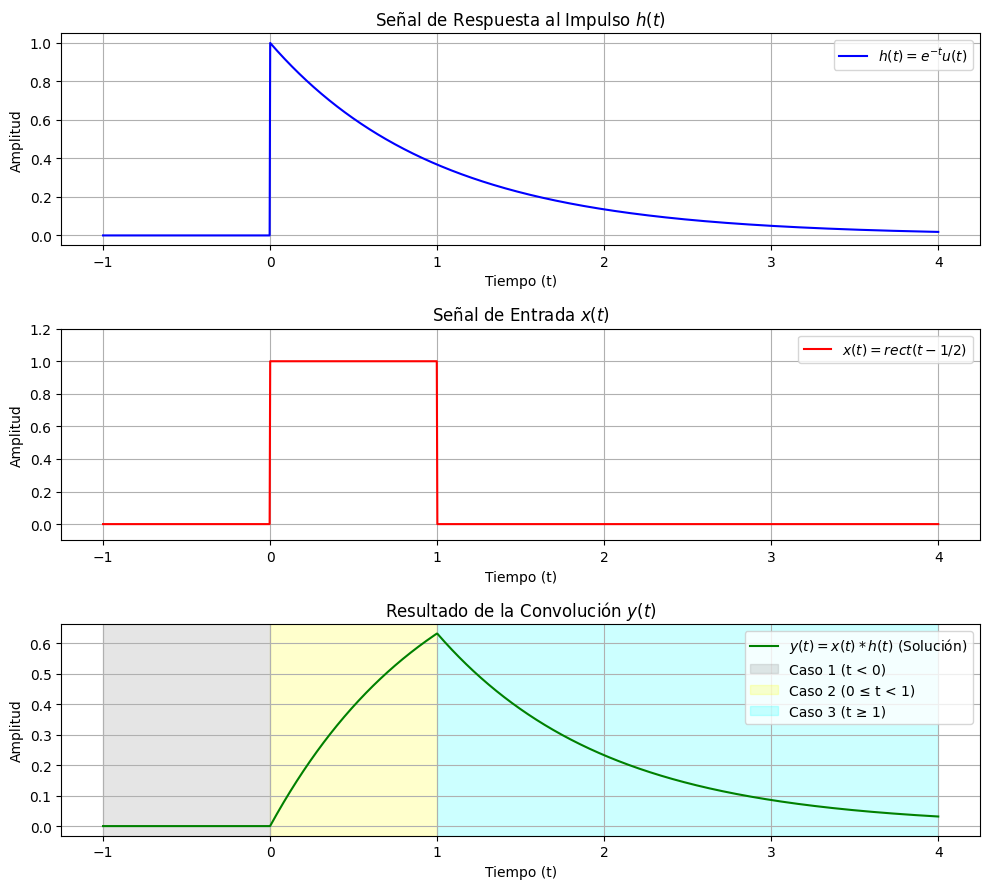

In [ ]:
#@title 📈 Solución de Convolución Analítica
#
# Este script de Colab visualiza la solución al ejercicio
# de convolución y(t) = x(t) * h(t)
#
# h(t) = exp(-t)u(t)
# x(t) = rect(t - 1/2)  (pulso de 0 a 1)

import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definir el vector de tiempo ---
# np.linspace(inicio, fin, num_puntos)
# Usamos un vector de tiempo denso para gráficas suaves
t = np.linspace(-1, 4, 1500)

# --- 2. Definir las señales de entrada ---

# h(t) = e^{-t} * u(t)
# (t >= 0) actúa como el escalón unitario u(t)
h_t = np.exp(-t) * (t >= 0)

# x(t) = rect(t - 1/2)
# Es 1 para 0 < t < 1, y 0 en otro caso
x_t = 1.0 * ((t > 0) & (t < 1))

# --- 3. Definir la solución ANALÍTICA (del ejercicio) ---
# y(t) es una función por partes:
# Caso 1: t < 0         -> y(t) = 0
# Caso 2: 0 <= t < 1  -> y(t) = 1 - exp(-t)
# Caso 3: t >= 1        -> y(t) = (e - 1) * exp(-t)

# Usamos np.piecewise para construir la solución fácilmente
y_t = np.piecewise(t,
    [t < 0, (t >= 0) & (t < 1), t >= 1], # Condiciones
    [
        0.0,                            # Caso 1
        lambda t: 1 - np.exp(-t),        # Caso 2
        lambda t: (np.e - 1) * np.exp(-t) # Caso 3
    ]
)

# --- 4. Graficar los resultados ---
plt.figure(figsize=(10, 9))

# Gráfica 1: h(t)
plt.subplot(3, 1, 1)
plt.plot(t, h_t, 'b', label='$h(t) = e^{-t}u(t)$')
plt.title('Señal de Respuesta al Impulso $h(t)$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Gráfica 2: x(t)
plt.subplot(3, 1, 2)
plt.plot(t, x_t, 'r', label='$x(t) = rect(t - 1/2)$')
plt.title('Señal de Entrada $x(t)$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.ylim(-0.1, 1.2) # Ajustar límites para el pulso
plt.grid(True)
plt.legend()

# Gráfica 3: y(t) = x(t) * h(t)
plt.subplot(3, 1, 3)
plt.plot(t, y_t, 'g', label='$y(t) = x(t) * h(t)$ (Solución)')
plt.title('Resultado de la Convolución $y(t)$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')

# Marcar visualmente los 3 casos en la gráfica de la solución
plt.axvspan(-1, 0, color='gray', alpha=0.2, label='Caso 1 (t < 0)')
plt.axvspan(0, 1, color='yellow', alpha=0.2, label='Caso 2 (0 ≤ t < 1)')
plt.axvspan(1, 4, color='cyan', alpha=0.2, label='Caso 3 (t ≥ 1)')

plt.grid(True)
plt.legend()

plt.tight_layout() # Ajustar para que no se superpongan
plt.show()

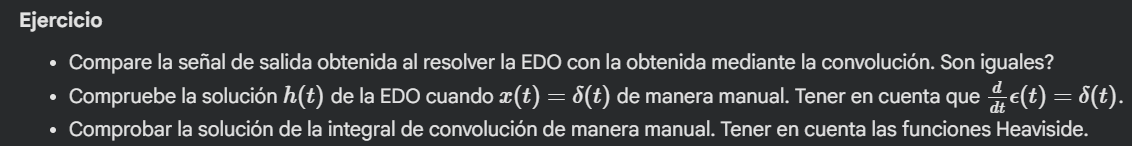

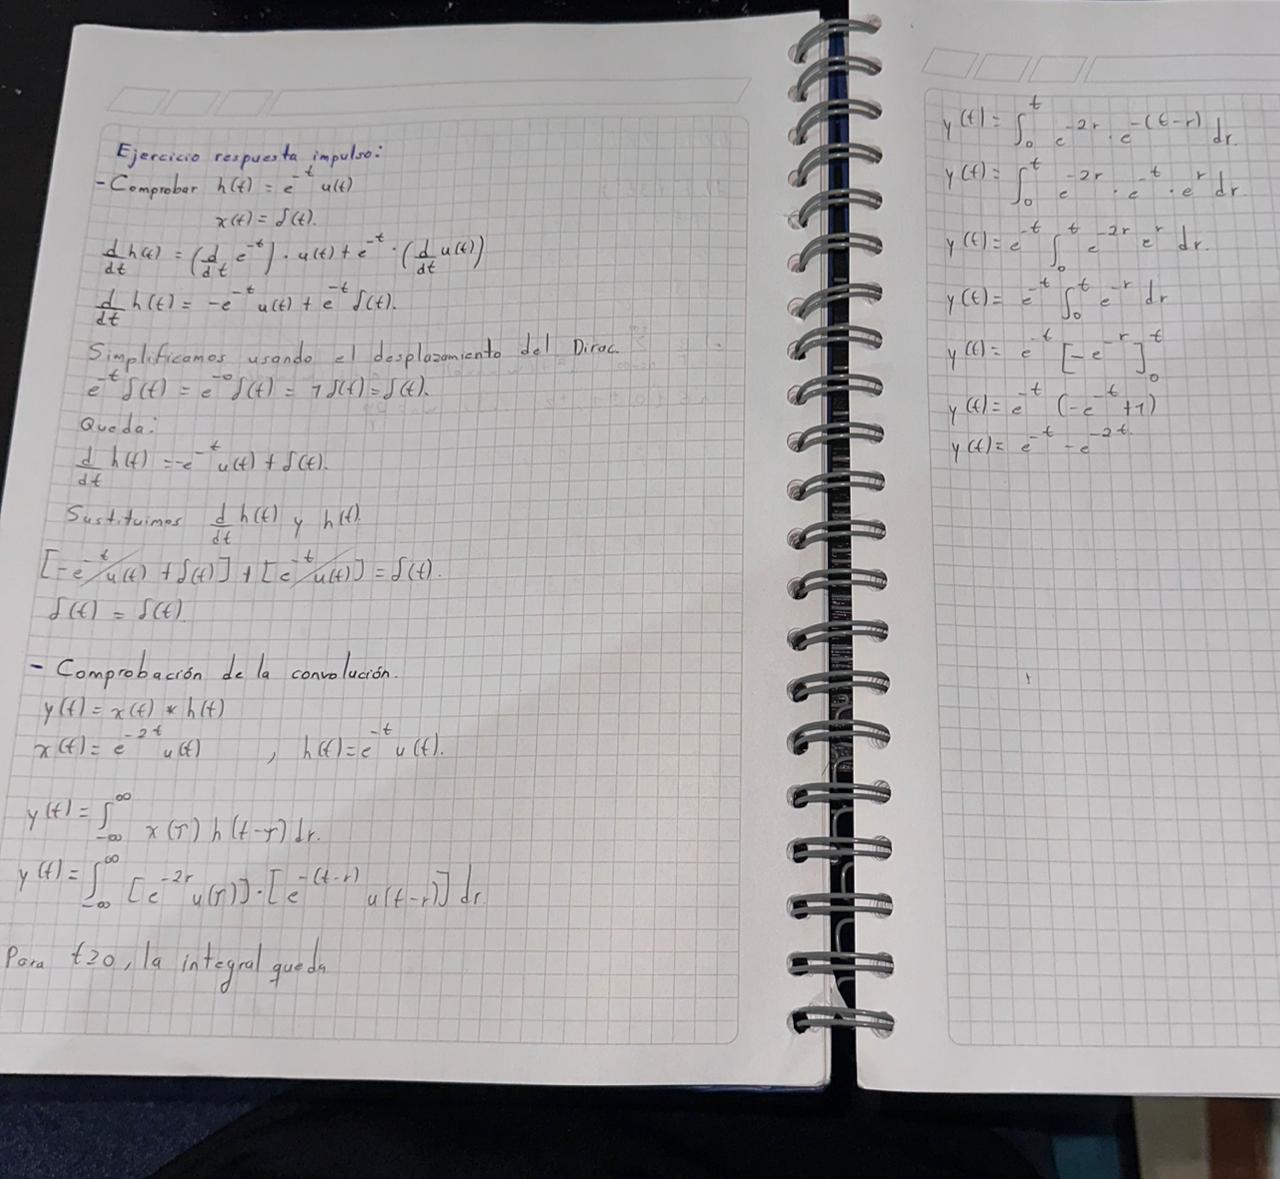